# Notebook III - Climatic Constraints

<hr>
<hr>

## Importing Libraries

In [10]:
'''import supporting libraries'''

import numpy as np
import matplotlib.pyplot as plt
import imageio

import sys
sys.path.append('./code/') # add path to source code directory

## Applying Climate Constraints

In [11]:
'''importing library'''

import ClimaticConstraints
obj_constraints = ClimaticConstraints.ClimaticConstraints()

import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [13]:
'''Reading data'''
lgp_equv = imageio.imread('./sample_data/output/NB1/LGPEquivalent.tif');

lgp = imageio.imread(r'./sample_data/output/NB1/LGP.tif');

yield_map_rain = imageio.imread(r'./sample_data/output/NB2/CropSuitability_rain.tif');
yield_map_irr = imageio.imread(r'./sample_data/output/NB2/CropSuitability_irr.tif');

In [16]:
'''applying climate constraints'''
path= r'./sample_data/input/Climatic_constraint.xlsx'
obj_constraints.Read_from_csv( path, 'HI', 'Wheat')

yield_map_rain_m3 = obj_constraints.applyClimaticConstraints(lgp_equv, yield_map_rain,  lgp) # I: Irrigated, R: Rain-fed
yield_map_irr_m3 = obj_constraints.applyClimaticConstraints(lgp_equv, yield_map_irr, lgp,) # I: Irrigated, R: Rain-fed

## get classified output
yield_map_rain_class_m3 = obj_utilities.classifyFinalYield(yield_map_rain_m3)
yield_map_irr_class_m3 = obj_utilities.classifyFinalYield(yield_map_irr_m3)

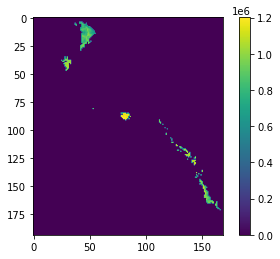

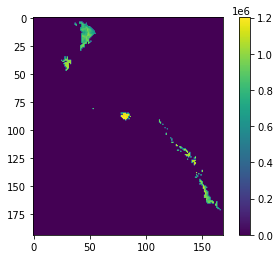

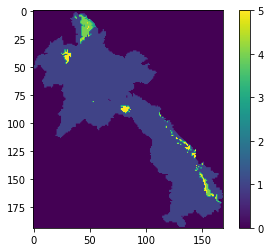

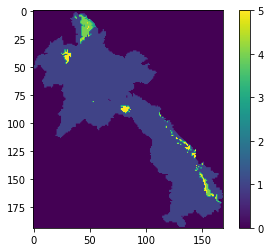

In [17]:
'''visualize result'''

plt.imshow(yield_map_rain_m3)
plt.colorbar()
plt.show()

plt.imshow(yield_map_irr_m3)
plt.colorbar()
plt.show()

plt.imshow(yield_map_rain_class_m3)
plt.colorbar()
plt.show()

plt.imshow(yield_map_irr_class_m3)
plt.colorbar()
plt.show()

In [18]:
'''save result'''

obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/NB3/CropSuitability_rain_m3.tif', yield_map_rain_m3)
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/NB3/CropSuitability_irr_m3.tif', yield_map_irr_m3)

obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/NB3/CropSuitability_rain_class_m3.tif',yield_map_rain_class_m3)
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif', './sample_data/output/NB3/CropSuitability_irr_class_m3.tif',yield_map_irr_class_m3)

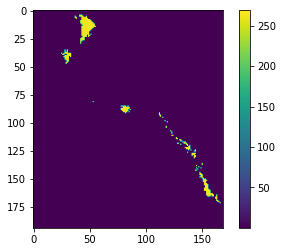

In [22]:
'''Saving the reduction factor numpy as raster'''
reduction = obj_constraints.getreductionfactor()
plt.imshow(reduction)
plt.colorbar()
plt.show()
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif','./sample_data/output/Reduction Factor/F3.tif', reduction)


In [24]:
"""Combine crop constraint"""

f1 = imageio.imread('./sample_data/output/Reduction Factor/F1.tif')
f2 = imageio.imread('./sample_data/output/Reduction Factor/F12.tif')
f3 = imageio.imread('./sample_data/output/Reduction Factor/F3.tif')
fcombined_rainfed = obj_constraints.fcombined_rainfed( f1, f2, f3)
fcombined_irrigate = obj_constraints.fcombined_irrigate(f1, f3)
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif','./sample_data/output/Reduction Factor/rainfed.tif', fcombined_rainfed)
obj_utilities.saveRaster('./sample_data/input_5/LAO_Admin.tif','./sample_data/output/Reduction Factor/irrigated.tif', fcombined_irrigate)